In [1]:
import pandas as pd
import myplot as mp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

pd.set_option("display.max_rows", 10)

# Dataset

In [2]:
# Membaca file excel
df = pd.read_excel('dataset.xlsx')
# Mengurutkan File berdasarkan tahun
df = df.sort_values(by='Tahun', ascending=True).reset_index(drop=True)
df 

,Tipe,Tahun,Luas Bgn,Luas Tanah,Jml Kmr Tidur,Jml Kmr Mandi,Garasi,Harga,Lokasi
0,21.0,2018,21,50,1,1,1,127600000,NaN
1,90.0,2018,90,112,3,1,1,610000000,NaN
2,80.0,2018,80,120,3,2,1,601000000,NaN
3,68.0,2018,68,85,3,2,1,554000000,NaN
4,36.0,2018,36,60,2,1,1,174000000,NaN
...,...,...,...,...,...,...,...,...,...
55,NaN,2023,45,70,2,1,1,250000000,NaN
56,NaN,2023,36,60,2,1,1,210000000,NaN
57,NaN,2023,21,50,1,1,1,155000000,NaN
58,NaN,2023,80,120,3,2,1,674000000,NaN


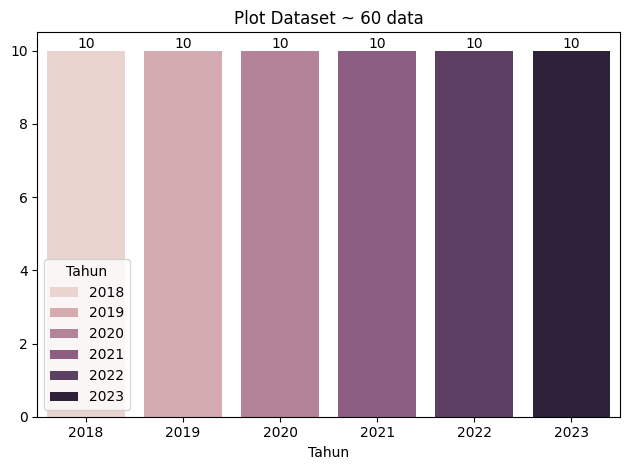

In [3]:
# Count data tahun
count_df = df['Tahun'].value_counts()
# Plot
mp.bar_plot(x=count_df.index, y=count_df.values, hue=count_df.index, title=f"Plot Dataset ~ {count_df.values.sum()} data")

# Pemrosesan Awal (Preprocessing)

### Memilih fitur (Select Features)

In [4]:
# Fitur yang akan digunakan adalah: Tahun, Luas Bgn, Luas Tanah, Jml Kmr Tidur, Jml Kmr Mandi, Garasi, dan Harga
df1 = df.drop(['Tipe', 'Lokasi'], axis=1).copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Tahun          60 non-null     int64
 1   Luas Bgn       60 non-null     int64
 2   Luas Tanah     60 non-null     int64
 3   Jml Kmr Tidur  60 non-null     int64
 4   Jml Kmr Mandi  60 non-null     int64
 5   Garasi         60 non-null     int64
 6   Harga          60 non-null     int64
dtypes: int64(7)
memory usage: 3.4 KB


### Pembersihan Data (Data Cleaning)

In [5]:
# Menghapus baris data yang kosong
df1 = df1.dropna()
# Menghapus data duplikat
df1 = df1.drop_duplicates()

In [6]:
# Mengecek data
print(f"Jumlah data yang kosong\t\t: {df1.isna().values.sum()}")
print(f"Jumlah data yang duplikat\t: {df1.duplicated().values.sum()}")

Jumlah data yang kosong		: 0
Jumlah data yang duplikat	: 0


### Transformasi Data (Data Transformation)

In [7]:
# Mengubah fitur harga menjadi per juta
df_final = df1.copy()
df_final['Harga'] = df_final['Harga'].values / 1000000
df_final

,Tahun,Luas Bgn,Luas Tanah,Jml Kmr Tidur,Jml Kmr Mandi,Garasi,Harga
0,2018,21,50,1,1,1,127.6
1,2018,90,112,3,1,1,610.0
2,2018,80,120,3,2,1,601.0
3,2018,68,85,3,2,1,554.0
4,2018,36,60,2,1,1,174.0
...,...,...,...,...,...,...,...
55,2023,45,70,2,1,1,250.0
56,2023,36,60,2,1,1,210.0
57,2023,21,50,1,1,1,155.0
58,2023,80,120,3,2,1,674.0


# Implementasi Support Vector Regression (SVR)

### Memilih Fitur dan Target (Select Features and Target)

In [8]:
# Fitur
fitur = df_final.drop('Harga', axis=1).copy()
# Target
target = df_final['Harga'].copy()

array_fitur = np.array(fitur)
array_target = np.array(target)

print(f"Kolom Fitur\t: {', '.join(fitur.columns)}")
print(f"Kolom Target\t: {target.name}")

Kolom Fitur	: Tahun, Luas Bgn, Luas Tanah, Jml Kmr Tidur, Jml Kmr Mandi, Garasi
Kolom Target	: Harga


### Memisahkan Data Pelatihan dan Pengujian (Separating Training and Testing Data)

Data pelatihan 80% dan
Data pengujian 20%

In [9]:
X_train, X_test, y_train, y_test = train_test_split(array_fitur, array_target,
                                                    train_size=0.8,
                                                    random_state=42)

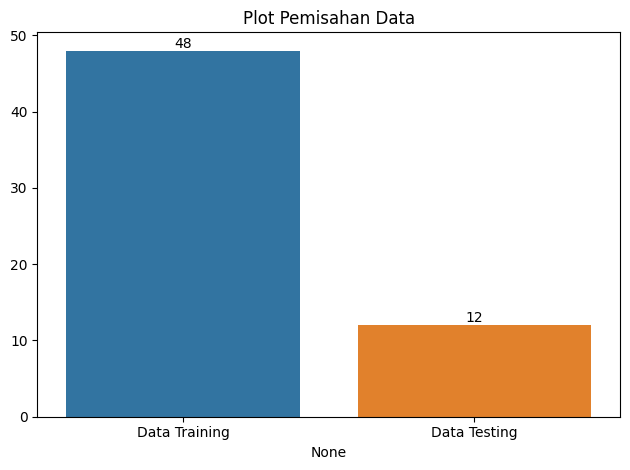

In [10]:
# Plot
df_split = pd.DataFrame([[X_train.shape[0], X_test.shape[0]]], columns=['Data Training', 'Data Testing'])
mp.bar_plot(x=df_split.columns, y=df_split.values[0], hue=df_split.columns, title="Plot Pemisahan Data")

### Melatih Model SVR Menggunakan Grid Search Cross-Validation

In [11]:
# Model SVM
model = SVR()

In [12]:
# Grid parameter yang akan diuji
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
}

# Inisialisasi GSCV
GSCV = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_percentage_error')
# Training GSCV
GSCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_absolute_percentage_error')

### Prediksi (Predictions)

In [13]:
# Prediksi
y_pred = GSCV.predict(X_test)

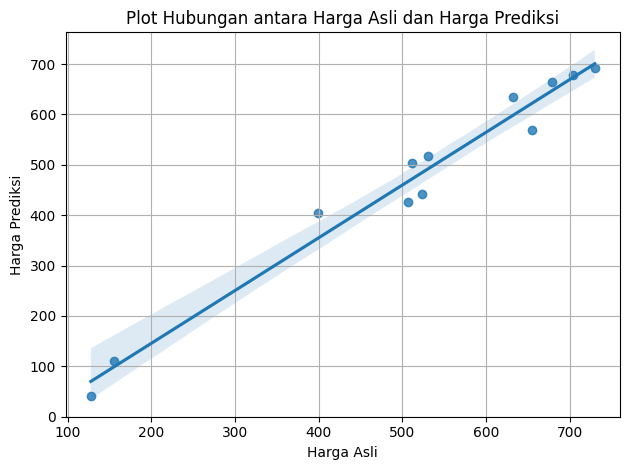

In [15]:
# Plot Prediksi
df_pred = pd.DataFrame(X_test, columns=fitur.columns)
df_pred['Harga Asli'] = y_test
df_pred['Harga Prediksi'] = y_pred

mp.reg_plot(data=df_pred, x='Harga Asli', y='Harga Prediksi', title="Plot Hubungan antara Harga Asli dan Harga Prediksi")